In [7]:
!uv pip install \
    pandas==2.3.2 \
    pandas-stubs==2.3.2.250827 \
    numpy==2.3.2 \
    matplotlib==3.10.6 \
    seaborn==0.13.2 \
    scikit-learn==1.7.1


Audited 6 packages in 11ms


In [ ]:
import sys

# sys.executable # Confirm that packages are in uv cache

In [ ]:
from collections import Counter
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

sns.set_style("darkgrid")

# print(sklearn.__version__)

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.rename(
    {
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width",
    },
    axis=1,
    inplace=True,
)

df["target"] = iris.target

df["target"] = df["target"].map(
    {
        0: "setosa",
        1: "versicolor",
        2: "virginica",
    }
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


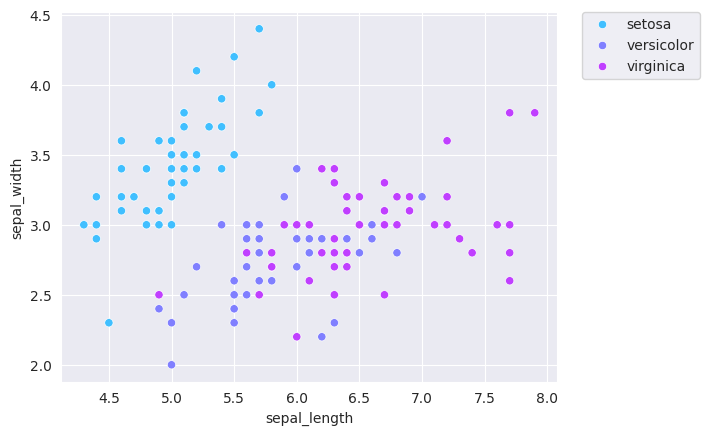

In [ ]:
sns.scatterplot(
    x="sepal_length", y="sepal_width", hue="target", data=df, palette="cool"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

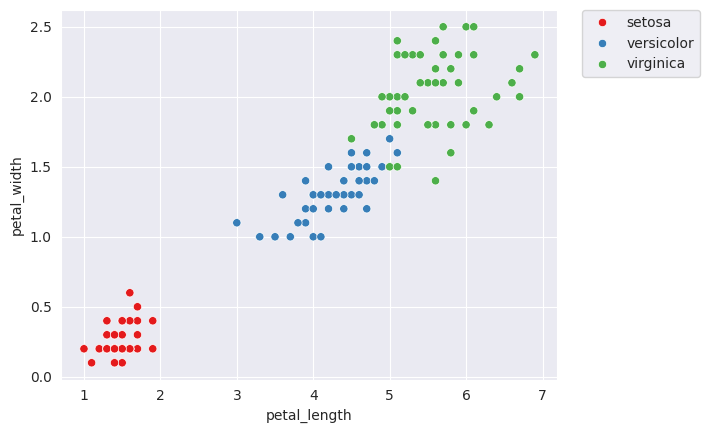

In [ ]:
sns.scatterplot(
    data=df, x="petal_length", y="petal_width", hue="target", palette="Set1"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

evaluation = accuracy_score(y_test, pred)

print(f"Accuracy: {evaluation * 100:.2f}%")

Accuracy: 100.00%


In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
neighbors = list(range(1, 50, 2))
cv_scores: List[float] = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
    cv_scores.append(scores.mean())

type(cv_scores[1])

numpy.float64

In [ ]:
mse = [1 - x for x in cv_scores]  # Misclassification Error


def find_min_index(x: List[float]) -> int:
    vector: List[int] = []
    for index, value in enumerate(x):
        if value == min(x):
            vector.append(index)
    return max(vector)


optimal_k = neighbors[find_min_index(mse)]
optimal_rse = min(mse)  # Root Squared Error

print(
    f"The optimal number of neighbors is {optimal_k} with RSE of {optimal_rse:.4f}"
)

The optimal number of neighbors is 11 with RSE of 0.0417


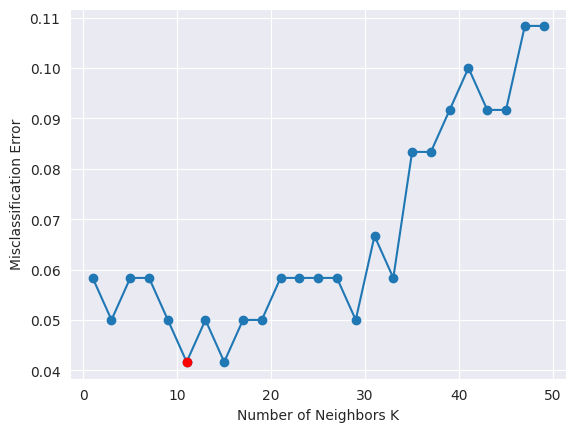

In [ ]:
plt.plot(neighbors, mse, marker="o")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.plot(optimal_k, optimal_rse, "ro")
plt.show()